In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,LeakyReLU,ReLU,Flatten,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu,sigmoid,softmax
from tensorflow.keras.applications.vgg16 import VGG16


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
image_size = [224,224]

train_data = '/content/drive/MyDrive/cat and dog/cat & Dog/training_set/training_set'
test_data = '/content/drive/MyDrive/cat and dog/cat & Dog/test_set/test_set'

In [5]:
vgg16 = VGG16(input_shape=image_size + [3] , weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [6]:
for layers in vgg16.layers:
  layers.trainable=False

In [7]:
from tensorflow.keras.layers import Flatten

In [8]:
x =Flatten()(vgg16.output)

In [9]:
from glob import glob

In [10]:
a = glob("/content/drive/MyDrive/cat and dog/cat & Dog/test_set/test_set/*")

In [11]:
a

['/content/drive/MyDrive/cat and dog/cat & Dog/test_set/test_set/cats',
 '/content/drive/MyDrive/cat and dog/cat & Dog/test_set/test_set/dogs']

In [12]:
len(a)

2

In [13]:
predict = Dense(len(a),activation='softmax')(x)

In [14]:
model = Model(inputs = vgg16.inputs,outputs=predict)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
model.compile(optimizer='adaDelta',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
training_data = ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)

In [19]:
testing_data = ImageDataGenerator(rescale=1./255)

In [20]:
train = training_data.flow_from_directory('/content/drive/MyDrive/cat and dog/cat & Dog/training_set/training_set',
                                    target_size=(224,224),batch_size=32,class_mode='categorical')

Found 8027 images belonging to 2 classes.


In [21]:
test = testing_data.flow_from_directory('/content/drive/MyDrive/cat and dog/cat & Dog/test_set/test_set',
                                    target_size=(224,224),batch_size=32,class_mode='categorical')

Found 2024 images belonging to 2 classes.


In [22]:
model.fit(train,validation_data=test,epochs=20,steps_per_epoch=len(train),
  validation_steps=len(test))

Epoch 1/20
251/251 [==============================] - 2038s 8s/step - loss: 0.7272 - accuracy: 0.4906 - val_loss: 0.7017 - val_accuracy: 0.5366
Epoch 2/20
251/251 [==============================] - 117s 466ms/step - loss: 0.6839 - accuracy: 0.5630 - val_loss: 0.6671 - val_accuracy: 0.5815
Epoch 3/20
251/251 [==============================] - 116s 462ms/step - loss: 0.6570 - accuracy: 0.6142 - val_loss: 0.6387 - val_accuracy: 0.6245
Epoch 4/20
251/251 [==============================] - 116s 461ms/step - loss: 0.6297 - accuracy: 0.6499 - val_loss: 0.6149 - val_accuracy: 0.6537
Epoch 5/20
251/251 [==============================] - 117s 466ms/step - loss: 0.6132 - accuracy: 0.6684 - val_loss: 0.5898 - val_accuracy: 0.6922
Epoch 6/20
251/251 [==============================] - 118s 470ms/step - loss: 0.5832 - accuracy: 0.7135 - val_loss: 0.5689 - val_accuracy: 0.7129
Epoch 7/20
251/251 [==============================] - 118s 470ms/step - loss: 0.5694 - accuracy: 0.7340 - val_loss: 0.5501 - v

In [23]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
train_loss = model.history.history['loss']

In [25]:
train_loss

[0.7151585817337036,
 0.677792489528656,
 0.6507920026779175,
 0.623773992061615,
 0.6068018078804016,
 0.5803359746932983,
 0.563701331615448,
 0.5450296998023987,
 0.5324461460113525,
 0.5127573013305664,
 0.49924787878990173,
 0.48303118348121643,
 0.4762342572212219,
 0.46409234404563904,
 0.45604225993156433,
 0.4449043273925781,
 0.44091108441352844,
 0.430637925863266,
 0.4222991466522217,
 0.4151928722858429]

In [26]:
train_accuracy = model.history.history['accuracy']

train_accuracy


[0.5097795128822327,
 0.5740625262260437,
 0.6186619997024536,
 0.6561604738235474,
 0.6784601807594299,
 0.7157095074653625,
 0.7361405491828918,
 0.754453718662262,
 0.7639217376708984,
 0.7846019864082336,
 0.7936962842941284,
 0.8066525459289551,
 0.8101407885551453,
 0.8143764734268188,
 0.8142518997192383,
 0.8247165679931641,
 0.8252149224281311,
 0.8294506072998047,
 0.837299108505249,
 0.8409119248390198]

In [27]:
test_loss = model.history.history['loss']
test_loss

[0.7151585817337036,
 0.677792489528656,
 0.6507920026779175,
 0.623773992061615,
 0.6068018078804016,
 0.5803359746932983,
 0.563701331615448,
 0.5450296998023987,
 0.5324461460113525,
 0.5127573013305664,
 0.49924787878990173,
 0.48303118348121643,
 0.4762342572212219,
 0.46409234404563904,
 0.45604225993156433,
 0.4449043273925781,
 0.44091108441352844,
 0.430637925863266,
 0.4222991466522217,
 0.4151928722858429]

In [28]:
test_accuracy = model.history.history['accuracy']
test_accuracy

[0.5097795128822327,
 0.5740625262260437,
 0.6186619997024536,
 0.6561604738235474,
 0.6784601807594299,
 0.7157095074653625,
 0.7361405491828918,
 0.754453718662262,
 0.7639217376708984,
 0.7846019864082336,
 0.7936962842941284,
 0.8066525459289551,
 0.8101407885551453,
 0.8143764734268188,
 0.8142518997192383,
 0.8247165679931641,
 0.8252149224281311,
 0.8294506072998047,
 0.837299108505249,
 0.8409119248390198]

In [31]:
epochs = np.arange(1,21)

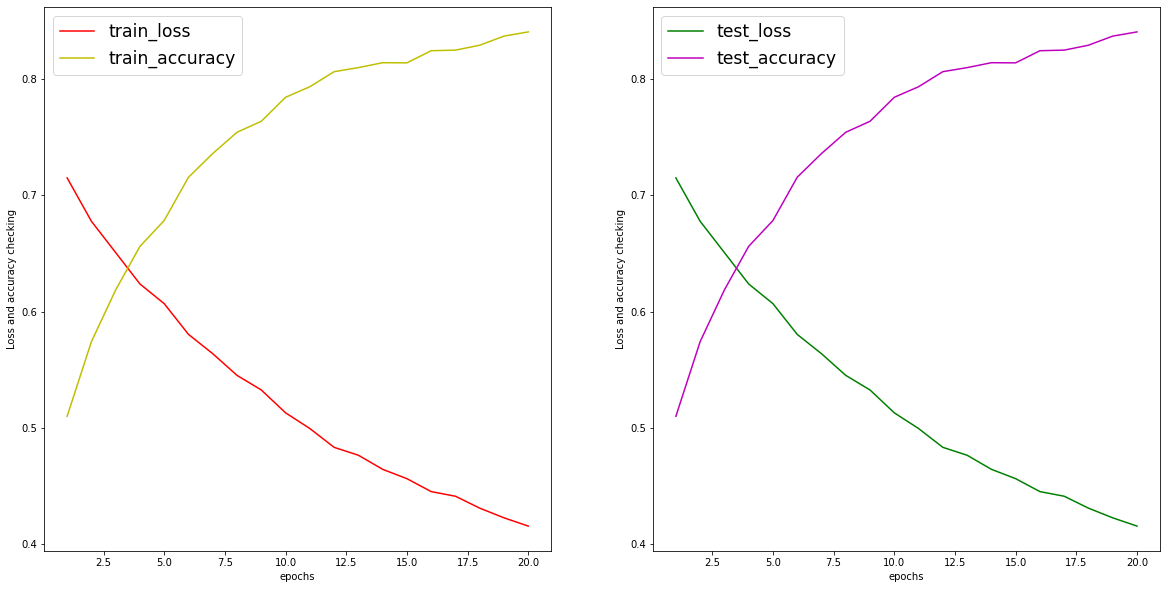

In [32]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(epochs,train_loss,color='r',label='train_loss')
plt.plot(epochs,train_accuracy,color='y',label='train_accuracy')
plt.legend(loc='best',fontsize='xx-large')
plt.xlabel("epochs")
plt.ylabel('Loss and accuracy checking')
plt.subplot(1,2,2)
plt.plot(epochs,test_loss,color='g',label='test_loss')
plt.plot(epochs,test_accuracy,color='m',label='test_accuracy')
plt.xlabel("epochs")
plt.ylabel('Loss and accuracy checking')
plt.legend(loc='best',fontsize='xx-large')
plt.show()

In [33]:
from tensorflow.keras.preprocessing import image

In [34]:
classes = {0:"Cat",1:'Dog'}
for i in classes.items():
    print(i)

(0, 'Cat')
(1, 'Dog')


[[1.000000e+00 4.932148e-17]]
[0]
Cat


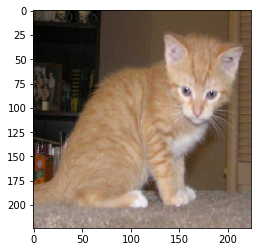

In [35]:
image_path = '/content/drive/MyDrive/cat and dog/cat & Dog/test_set/test_set/cats/cat.4003.jpg'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)

[[0. 1.]]
[1]
Dog


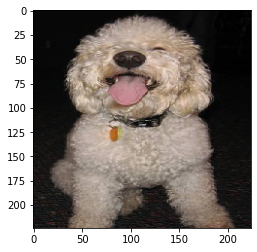

In [36]:
image_path = '/content/drive/MyDrive/cat and dog/cat & Dog/test_set/test_set/dogs/dog.4003.jpg'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)

[[1.5011103e-21 1.0000000e+00]]
[1]
Dog


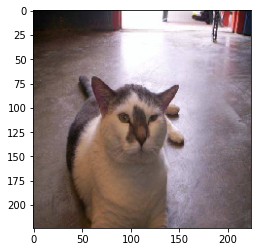

In [38]:
image_path = '/content/drive/MyDrive/cat and dog/cat & Dog/test_set/test_set/cats/cat.4683.jpg'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)

[[0. 1.]]
[1]
Dog


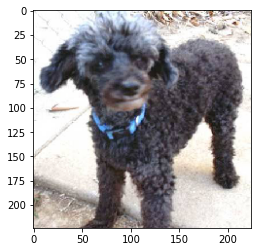

In [37]:
image_path = '/content/drive/MyDrive/cat and dog/cat & Dog/test_set/test_set/dogs/dog.4396.jpg'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)